Importing data and basic libraries

In [1]:
import pandas as pd                                      
import numpy as np

reading data

In [5]:
data=pd.read_csv(r'D:\ml\BmiStatus\bmi.csv')
visual=pd.read_csv(r'D:\ml\BmiStatus\bmi.csv')

In [6]:
data.head(6)

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3


In [14]:
data.shape

(500, 4)

Missing values ?

In [13]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
dtype: bool

Importing visualization and plotting libraries

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

adding additional columns to dataframe as per need

In [20]:
def index_to_description(x):
    if x['Index'] == 0:
        return  'extremely weak'
    elif x['Index'] == 1:
        return 'weak'
    elif x['Index'] == 2:
        return  'normal'
    elif x['Index'] == 3:
        return  'overweight'
    if x['Index'] == 4:
        return  'obesity'
    if x['Index'] == 5:
        return  'extremely obesity'
visual['status']=visual.apply(index_to_description,axis=1)  # axis=1 column wise
visual.head()

,Gender,Height,Weight,Index,status
0,Male,174,96,4,obesity
1,Male,189,87,2,normal
2,Female,185,110,4,obesity
3,Female,195,104,3,overweight
4,Male,149,61,3,overweight


In [21]:
def gender_to_label(y):
    if y['Gender']=='Male':
        return 1
    elif y['Gender']== 'Female':
        return 0
visual['gender_lbl']=visual.apply(gender_to_label,axis=1)
visual.head()

,Gender,Height,Weight,Index,status,gender_lbl
0,Male,174,96,4,obesity,1
1,Male,189,87,2,normal,1
2,Female,185,110,4,obesity,0
3,Female,195,104,3,overweight,0
4,Male,149,61,3,overweight,1


Scatter plot showing different categories 

Text(0.5, 1.0, 'height vs weight')

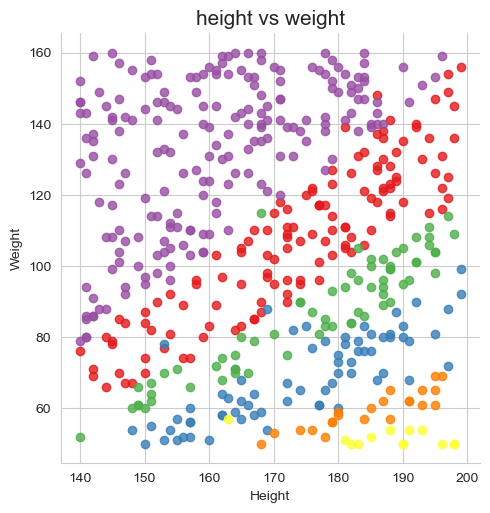

In [30]:
sns.set_style('whitegrid') 
sns.lmplot(x='Height',
           y='Weight', data=visual, fit_reg=False, hue='status',legend=False,aspect=1,palette='Set1') 
ax1=plt.gca() 
ax1.set_title('height vs weight', size=15)

Counting people based on Gender, Health status, etc.

In [31]:
people=visual['Gender'].value_counts()
print(type(people))
people.head()


<class 'pandas.core.series.Series'>


Female    255
Male      245
Name: Gender, dtype: int64

In [32]:
categories = visual['status'].value_counts()
categories

extremely obesity    198
obesity              130
normal                69
overweight            68
weak                  22
extremely weak        13
Name: status, dtype: int64

pie-plot representing features (Gender, Health Status) for all people

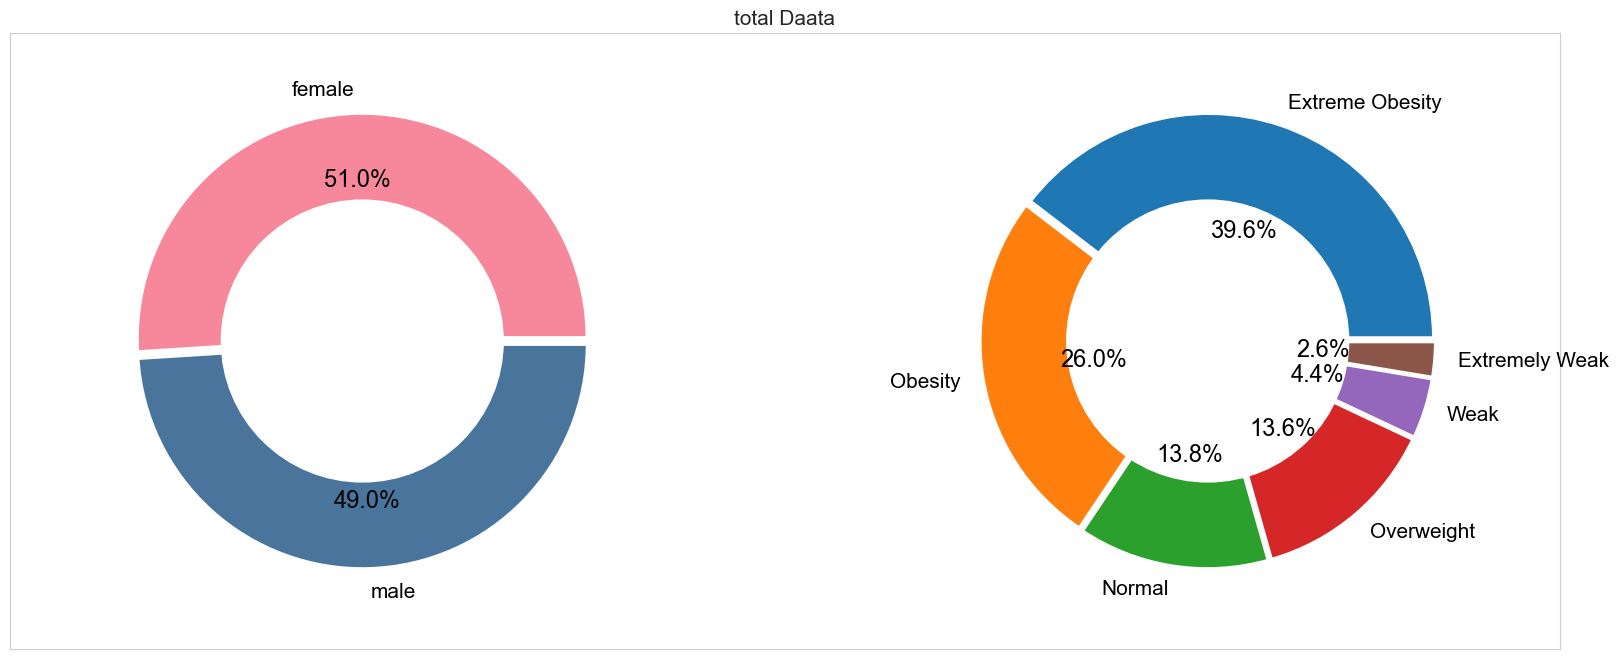

In [35]:
fig=plt.figure(figsize=(20,8))
plt.title("total Daata", loc='center',weight=10,size=15)
plt.xticks([])
plt.yticks([])

#people pie chat
ax1 = fig.add_subplot(121)
ax1.axis('equal')
explode = (0.01,)*(len(people))

wedges, texts, autotexts =  ax1.pie(people,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['female','male'],
                                    colors=['#f7879a','#49759c'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.7,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts,size=17)
plt.setp(texts,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes

ax2 = fig.add_subplot(122)
ax2.axis('equal')
explode = (0.01,)*(len(categories))
wedges2, texts2, autotexts2 =  ax2.pie(categories,
                                    radius=0.8,
                                    explode=explode,
                                    labels=['Extreme Obesity','Obesity','Normal','Overweight','Weak','Extremely Weak'],
                                    autopct="%1.1f%%",
                                    pctdistance=0.5,
                                    textprops=dict(color='k'),
                                    wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'w' }
                                    )
plt.setp(autotexts2,size=17)
plt.setp(texts2,size=15)
my_circle = plt.Circle((0,0),0.5,color='white')
p = plt.gcf() # get current figure reference
p.gca().add_artist(my_circle) # get current axes
